In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"achmadfauzannabil","key":"6f9e7aee51e86f68151fb3d8ff867f43"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 7.24MB/s]


In [4]:
!mkdir iris
!unzip iris.zip -d iris
!ls iris

Archive:  iris.zip
  inflating: iris/Iris.csv           
  inflating: iris/database.sqlite    
database.sqlite  Iris.csv


In [25]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv('/content/iris/Iris.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.shape

(150, 6)

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<ipython-input-17-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

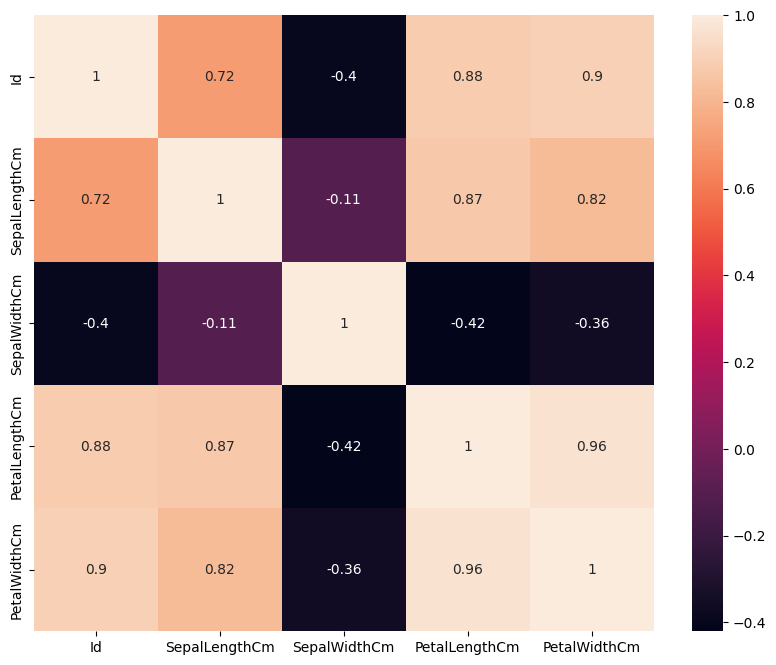

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [20]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [23]:
df = df.drop(['Id'], axis=1)

In [24]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
label_encoder = LabelEncoder()

df['Species'] = label_encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [29]:
X = df.drop(columns='Species', axis=1)
Y = df['Species']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, stratify=Y, random_state=30)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (90, 4) (60, 4)


In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train, Y_train)

LogisticRegression()

In [34]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [35]:
print("Akurasi data training : ", training_data_accuracy*100)

Akurasi data training :  98.88888888888889


In [37]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [38]:
print("Akurasi data testing : ", testing_data_accuracy*100)

Akurasi data testing :  93.33333333333333


In [39]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
input_data = (5.1, 3.5, 1.4, 0.2) # 0
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)
print()

decoded_prediction = label_encoder.inverse_transform(prediction)

if decoded_prediction == 'Iris-setosa':
    print('Tumbuhan Termasuk Kedalam Kelompok Iris Setosa')
elif decoded_prediction == 'Iris-versicolor':
    print('Tumbuhan Termasuk Kedalam Kelompok Iris Versicolor')
else:
    print('Tumbuhan Termasuk Kedalam Kelompok Iris Virginica')


[0]

Tumbuhan Termasuk Kedalam Kelompok Iris Setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [48]:
import pickle

pickle.dump(model, open("class_iris.sav", 'wb'))